[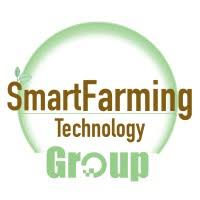](https://www.linkedin.com/company/sftgaua/)
# Plant Segmentation-Background Removal-2

## Instructions
1. Clone the repository.
2. Download the necessary datasets from Eden Repository:
   1. Broccoli-080919-Healthy-zz-V1-20210223132111
3. Unzip dataset files and remove the zip files.
4. Create a folder called 'eden_data'.
5. Move the unzipped datasets into this folder.
6. The resulting directory structure should be:
    * working_directory/image_preprocessing/
       * Background removal-Manual Method.ipynb
       * eden_data/
           * Broccoli-080919-Healthy-zz-V1-XXX...
7. Install notebook dependencies by running:
    <pre><code>conda create -n name_of_environment --file eden-package-list.txt</code></pre>
8. Open the notebook: jupyter notebook
9. Run the code

**Note:** If you find any issues while executing the notebook, don't hesitate to open an issue on Github. We will reply you as soon as possible.

## Background
The HSV representation models the way paints of different colors mix together, with the saturation dimension resembling various tints of brightly colored paint, and the value dimension resembling the mixture of those paints with varying amounts of black or white paint. The HSL model attempts to resemble more perceptual color models such as the Natural Color System (NCS) or Munsell color system, placing fully saturated colors around a circle at a lightness value of ​1⁄2, where a lightness value of 0 or 1 is fully black or white, respectively.

[<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/HSV_color_solid_cylinder_saturation_gray.png/800px-HSV_color_solid_cylinder_saturation_gray.png" style="width:20%;">](https://en.wikipedia.org/wiki/HSL_and_HSV)

1. Use gaussian blur for remove noise
2. Convert color to HSV 
3. Create mask
4. Create boolean mask
5. Apply boolean mask and getting image whithout background

In [1]:
import numpy as np
import cv2
from tqdm import tqdm
from glob import glob

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def read_data(path, im_size=(128,128)):
    X = []
    for im_file in tqdm(glob(path)):
        if im_file.lower().endswith("jpg"):
            try:
                label = im_file.split("/")[1]
                im = cv2.imread(im_file)
                im = cv2.resize(im, im_size)
                im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
                X.append(im)
            except Exception as e:
                print(e)
    
    X = np.array(X, np.uint8)
    return X

In [3]:
def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

In [4]:
X = read_data('eden_data/*/*')

100%|██████████| 94/94 [00:08<00:00, 17.21it/s]


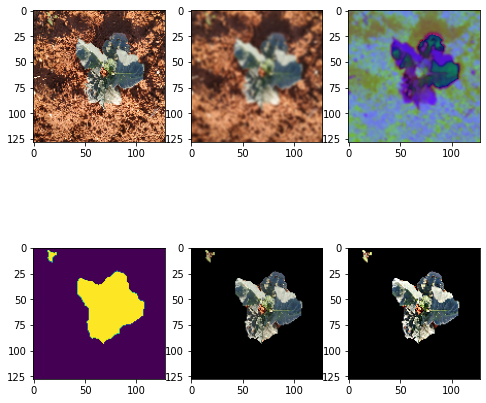

In [5]:
MIN_HUE = 0; MAX_HUE = 100
MIN_SAT = 0; MAX_SAT = 220
MIN_VAL = 0; MAX_VAL = 220

LOWER_GREEN = (MIN_HUE, MIN_SAT, MIN_VAL)
UPPER_GREEN = (MAX_HUE, MAX_SAT, MAX_VAL)
HOMOGENEOUS_SHAPE = (11, 11)
BLUR_LEVEL = (5, 5)

img = X[0]

# Use gaussian blur
blur_img = cv2.GaussianBlur(img, BLUR_LEVEL, 0)

# Convert to HSV image
hsv_img = cv2.cvtColor(blur_img, cv2.COLOR_BGR2HSV)  

# Create mask (parameters - green color range)
mask = cv2.inRange(hsv_img, LOWER_GREEN, UPPER_GREEN)  
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, HOMOGENEOUS_SHAPE)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Create boolean mask
b_mask = mask > 0  

# Apply the mask
clear = np.zeros_like(img, np.uint8)  # Create empty image
clear[b_mask] = img[b_mask]  # Apply boolean mask to the origin image

# Show examples
plt.figure(figsize=(8, 8))
plt.subplot(2, 3, 1); plt.imshow(img)  # Show the original image
plt.subplot(2, 3, 2); plt.imshow(blur_img)  # Blur image
plt.subplot(2, 3, 3); plt.imshow(hsv_img)  # HSV image
plt.subplot(2, 3, 4); plt.imshow(b_mask)  # Boolean mask
plt.subplot(2, 3, 5); plt.imshow(clear)  # Image with removed background
plt.subplot(2, 3, 6); plt.imshow(sharpen_image(clear)) # Sharpened version of the image

### References
https://www.cs.auckland.ac.nz/courses/compsci773s1c/lectures/ImageProcessing-html/topic4.htm

### Acknowledgements
This notebook was highly inspired by the work of **Gábor Vecsei** (https://www.kaggle.com/gaborvecsei/plant-seedlings-fun-with-computer-vision)